# Exercise_1
import the adjacency matrix data

In [199]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, exists, isfile, isdir, abspath, dirname, basename, realpath
from os import makedirs, listdir, pardir, getcwd

In [200]:
#parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join('data')
data = pd.read_csv(join(data_dir, "data.csv"), header=None,encoding= 'unicode_escape',sep=',',error_bad_lines=False)
matrix=data.to_numpy()

In [201]:
matrix=np.array([[1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1]])

# Exercise_1
visualize the graph in networkx

In [202]:
# G=nx.DiGraph()
# for index,row in data.iterrows():
#     for i in range(0,5):
#         if row[i]==1:
#             G.add_edge(index,i)
#             print(index,i)
G=nx.DiGraph()
for i in range(0,len(matrix)):
    for j in range(0,len(matrix)):
        if matrix[i,j]==1:
            G.add_edge(i,j)

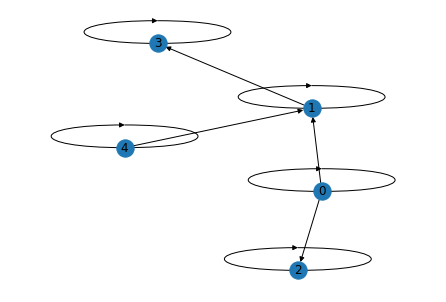

In [203]:
nx.draw(G,with_labels=True)

## Exercise_2
Build a Python function CompleteCheck testing if a binary relation is complete.

In [204]:
def completeCheck(matrix):
    matrix_transpose=matrix.transpose()
    matrix_check=matrix+matrix_transpose
    return (np.logical_not(np.any(matrix_check==0)))
completeCheck(matrix)

False

## Exercise_3
Build a Python function ReflexiveCheck testing if a binary relation is reflexive.

In [205]:
def reflexiveCheck(matrix):
    matrix_check=np.diagonal(matrix)
    print(matrix_check)
    return (np.all(matrix_check==1))
reflexiveCheck(matrix)

[1 1 1 1 1]


True

## Exercise_4
Build a Python function AsymmetricCheck testing if a binary relation is asymmetric.

In [206]:
def asymmetricCheck(matrix):
    matrix_transpose=matrix.transpose()
    matrix_check=matrix+matrix_transpose
    return (np.logical_not(np.any(matrix_check==2)))
asymmetricCheck(matrix)

False

## Exercise_5
Build a Python function SymmetricCheck testing if a binary relation is symmetric.

In [207]:
def symmetricCheck(matrix):
    matrix_transpose=matrix.transpose()
    matrix_check=matrix+matrix_transpose
    return (np.all(matrix_check==2))
symmetricCheck(matrix)

False

## Exercise_6
Build a Python function AntisymmetricCheck testing if a binary relation is antisymmetric.

In [208]:
def antisymmetricCheck(matrix):
    matrix_transpose=matrix.transpose()
    matrix_sum=matrix+matrix_transpose
    diag=np.diagonal(matrix_sum)
    matrix_diag=np.diag(diag)
    matrix_check=matrix_sum-matrix_diag
    return (np.logical_not(np.any(matrix_check==2)))
antisymmetricCheck(matrix)

True

## Exercise_7
Build a Python function TransitiveCheck testing if a binary relation is transitive.

In [209]:
def transitiveCheck(matrix):
    matrix_check=[]
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            for k in range(0,len(matrix)):
                if matrix[i,j]==1 and matrix[j,k]==1 :
                    matrix_check.append(matrix[i,k])
    return (np.logical_not(np.any(np.array(matrix_check) == 0)))
transitiveCheck(matrix)

[1]
[1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


False

## Exercise_8
Build a Python function NegativetransitiveCheck testing if a binary relation is negativetransitive.

In [210]:
def negativeTransitiveCheck(matrix):
    matrix_check=[]
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            for k in range(0,len(matrix)):
                if matrix[i,j]==0 and matrix[j,k]==0 :
                    matrix_check.append(matrix[i,k])
    return (np.all(np.array(matrix_check) == 0))
negativeTransitiveCheck(matrix)

False

## Exercise_9
Build a Python function CompleteOrderCheck testing if a binary relation is a complete order.

In [211]:
def completeOrderCheck(matrix):
    return (completeCheck(matrix) and antisymmetricCheck(matrix) and transitiveCheck(matrix))
completeOrderCheck(matrix)

False

## Exercise_10
Build a Python function CompletePreOrderCheck testing if a binary relation is a complete pre-order.

In [212]:
def completePreOrderCheck(matrix):
    return (completeCheck(matrix) and transitiveCheck(matrix))
completePreOrderCheck(matrix)

False

## Exercise_11
Build a Python function StrictRelation returning the strict relation part of a binary relation.

In [213]:
def stricRelation(matrix):
    matrix_strict=matrix
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i,j]==1 and matrix[j,i]==1:
                matrix_strict[i,j]==0
                matrix_strict[j,i]==0
    return matrix_strict
stricRelation(matrix)

array([[1, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1]])

## Exercise_12
Build a Python function IndifferenceRelation returning the indifference relation part of a binary relation.

In [214]:
def indifferenceRelation(matrix):
    matrix_indifference=np.zeros((len(matrix),len(matrix)))
    for i in range(0,len(matrix)):
        for j in range(0,len(matrix)):
            if matrix[i,j]==1 and matrix[j,i]==1:
                matrix_indifference[i,j]=1
                matrix_indifference[j,i]=1
    return matrix_indifference
indifferenceRelation(matrix)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Exercise_13
 Build a Python function Topologicalsorting returning a topological sorting of a binary relation.

In [231]:
def dagCheck(matrix):
    diag=np.diagonal(matrix)
    matrix_diag=np.diag(diag)
    matrix=matrix-matrix_diag
    matrix_reachable=np.identity(len(matrix))
    matrix_reachable_sum=np.zeros(len(matrix))
    for i in range(0,len(matrix)):
        matrix_reachable=matrix_reachable.dot(matrix)
        matrix_reachable_sum=matrix_reachable_sum+matrix_reachable
    return np.all(np.diagonal(matrix_reachable_sum.dot(matrix_reachable_sum))==0)
dagCheck(matrix)

True

In [238]:
def topologicalSorting(matrix):
    if dagCheck(matrix):
        diag=np.diagonal(matrix)
        matrix_diag=np.diag(diag)
        topologicalSorting_matrix=matrix-matrix_diag
        topologicalSorting_list=[]
        original_list=list(range(0,len(matrix)))
        while len(original_list) != 0:
            sum=topologicalSorting_matrix.sum(axis=1)
            for i in original_list:
                if sum[i]==0:
                    topologicalSorting_list.append(i)
                    topologicalSorting_matrix[:,i]=np.zeros(len(topologicalSorting_matrix))
                    original_list.remove(i)
        return topologicalSorting_list
    else:
        return("The input is not DAG, not plausible to the topologicalSorting problem")
topologicalSorting(matrix)

[2, 3, 1, 0, 4]